<a href="https://colab.research.google.com/github/Sornambal/Waste-Classification_System-using-AI-Deep-Learning-/blob/main/Waste_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Waste/dataset-resized/dataset-resized'

In [ ]:
import os

In [ ]:
print(os.listdir(data_dir))

['metal', 'plastic', 'cardboard', 'glass', 'paper']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
img_size = 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)


Found 1954 images belonging to 5 classes.
Found 486 images belonging to 5 classes.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic']


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7386 - loss: 0.6564 - val_accuracy: 0.5720 - val_loss: 1.2280
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7815 - loss: 0.5966 - val_accuracy: 0.5885 - val_loss: 1.2958
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8103 - loss: 0.5315 - val_accuracy: 0.5720 - val_loss: 1.3502
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8021 - loss: 0.5580 - val_accuracy: 0.5761 - val_loss: 1.3686
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8241 - loss: 0.4827 - val_accuracy: 0.5823 - val_loss: 1.4322
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8568 - loss: 0.3835 - val_accuracy: 0.5885 - val_loss: 1.6253
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8763 - loss: 0.3567 - val_accuracy: 0.5597 - val_loss: 1.6515
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8707 - loss: 0.3520 - val_accuracy: 0.6152 - val_lo

In [ ]:
model.save("/content/drive/MyDrive/waste_classifier_model.h5")


In [ ]:
!pip install opencv-python
!pip install tensorflow


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
from google.colab.patches import cv2_imshow
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = load_model('/content/drive/MyDrive/waste_classifier_model.h5')


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      const dataUrl = canvas.toDataURL('image/jpeg', quality);
      return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = np.frombuffer(base64.b64decode(data.split(',')[1]), dtype=np.uint8)

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


In [ ]:
import base64

# Define class names based on your dataset
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

def preprocess_image(img_path):
    img = PIL.Image.open(img_path).convert('RGB')
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(np.max(prediction) * 100, 2)

    print(f"♻️ Predicted Waste Type: {predicted_class} ({confidence}%)")


In [ ]:
img_path = take_photo()
predict_image(img_path)


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
♻️ Predicted Waste Type: cardboard (99.88999938964844%)


In [ ]:
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Get filename

# 2. Load image and preprocess
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 150, 150, 3)

# 3. Load model
model = load_model('/content/drive/MyDrive/waste_classifier_model.h5')

# 4. Define class names (edit according to your model)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# 5. Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)


Saving metal89.jpg to metal89.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted class: metal


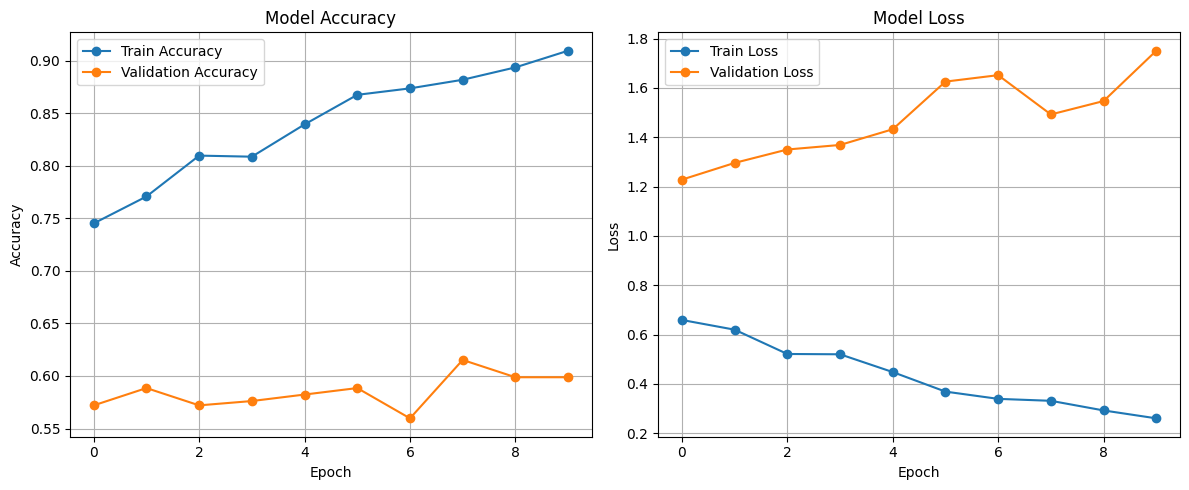

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
